In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Mounted at /content/gdrive
gdrive	sample_data


In [ ]:
%cd gdrive/MyDrive/'Colab Notebooks'/DIP/Final_CNN


/content/gdrive/MyDrive/Colab Notebooks/DIP/Final_CNN


In [ ]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

path day ==> pklot/PUCPR/{Cloudy/Runny/Sunny} /yyyy-mm-dd 

path image inside day ==> pklot/PUCPR/{Cloudy/Runny/Sunny} /yyyy-mm-dd/ yyyy-mm-dd_hh_mm_ss.jpg 

In [ ]:
height = 45
width = 45

In [ ]:
#run this in colab as system may crash
#if whole parking space images as input
path = "./dataset/UFPR04" #or UFPR05

pklot = ["UFPR04","PUC"]
weather= ["Cloudy"]                 #0 /1/ 2
#weather= ["Rainy"]
list_img = []

for folder in weather:
    p = os.path.join(path+"/"+folder)
    print("\n\np:",p)
    days = os.listdir(p)
    print(days[0])

    if folder == "Sunny":
      w = 0
    elif folder == "Rainy":
      w = 1
    else:
      w = 2

    print("weather: ", folder, ", w:", w)         
    for day in days:
        #day = days[i]
        in_day= os.path.join(p+"/"+day)
        print("in_day: ",in_day)
        for im in os.listdir(in_day):
            print(im)         #empty/occupied
            #sum_h=0
            #sum_w=0

            images = os.listdir(in_day+"/"+im)
            #print(images)     #images is a list of names of all images of parking spaces
            print(len(images),"##########")
            
            for img in images:
                if im == "Occupied":
                    
                    path_to_img = in_day+"/"+im+ "/"+img
                    space = cv.imread(path_to_img)
                    new = cv.resize(space , (height,width))
                    #plt.imshow(space)
                    #print(space.shape) 
                    list_img.append([img,w,1,np.array(new)])
                    #sum_h+=space.shape[0]       #to find average width and height
                    #sum_w+=space.shape[1]
                
                else:
                    
                    path_to_img = in_day+"/"+im+ "/"+img
                    space = cv.imread(path_to_img)
                    new = cv.resize(space , (height,width))
                    #plt.imshow(space)
                    #print(space.shape) 
                    list_img.append([img,w,0,np.array(new)])
                    #sum_h+=space.shape[0]
                    #sum_w+=space.shape[1]
                    
            
            
        print("len of list_img: ",len(list_img), ", len of list_img[0][2]: ", len(list_img[0][3]))   
        #print(sum_h,"\t", sum_w)
        #print("\nday: ",day,"\n",list_img)
        print("\n---------------------")
    print("******************************************************\n")    



p: ./dataset/UFPR04/Cloudy
2013-01-22
weather:  Cloudy , w: 2
in_day:  ./dataset/UFPR04/Cloudy/2013-01-22
Empty
247 ##########
Occupied
310 ##########
len of list_img:  557 , len of list_img[0][2]:  45

---------------------
in_day:  ./dataset/UFPR04/Cloudy/2012-12-29
Empty
310 ##########
len of list_img:  867 , len of list_img[0][2]:  45

---------------------
in_day:  ./dataset/UFPR04/Cloudy/2012-12-28
Occupied
42 ##########
Empty
310 ##########
len of list_img:  1219 , len of list_img[0][2]:  45

---------------------
in_day:  ./dataset/UFPR04/Cloudy/2013-01-29
Occupied
307 ##########
Empty
52 ##########
len of list_img:  1578 , len of list_img[0][2]:  45

---------------------
in_day:  ./dataset/UFPR04/Cloudy/2013-01-16
Occupied
310 ##########
Empty
310 ##########
len of list_img:  2198 , len of list_img[0][2]:  45

---------------------
in_day:  ./dataset/UFPR04/Cloudy/2013-01-19
Empty
308 ##########
Occupied
4 ##########
len of list_img:  2510 , len of list_img[0][2]:  45

----

'for xml_file in glob.glob(in_day + "/*.xml") :\n            print(xml_file)    #here xml file is taken\n            #when storing in csv file, image name as--> pklot[0]+"/"+folder+ "/"+ day+ "/"+ xml_file'

In [ ]:
#print(len(list_img))    #for sunny    #59524-(751+228) = 58545 - total sunny images
print(len(list_img))
#print(list_img[7957])
#print(list_img[7958])

6032


In [ ]:
print(list_img[58544])
print(list_img[58545])

['2012-12-26_13_55_09#002.jpg', 0, 1, array([[[ 44,  53,  56],
        [ 46,  55,  58],
        [ 43,  50,  53],
        ...,
        [153, 173, 186],
        [145, 168, 181],
        [147, 174, 186]],

       [[ 53,  69,  75],
        [ 43,  58,  64],
        [ 42,  55,  57],
        ...,
        [131, 143, 149],
        [137, 151, 157],
        [155, 171, 178]],

       [[ 57,  72,  75],
        [ 51,  64,  68],
        [ 45,  57,  57],
        ...,
        [178, 193, 195],
        [164, 178, 184],
        [153, 168, 174]],

       ...,

       [[ 54,  55,  50],
        [ 54,  54,  48],
        [ 50,  50,  44],
        ...,
        [183, 200, 196],
        [154, 168, 167],
        [157, 170, 171]],

       [[ 62,  62,  53],
        [ 59,  60,  51],
        [ 56,  57,  48],
        ...,
        [185, 201, 197],
        [158, 171, 168],
        [163, 174, 173]],

       [[ 77,  78,  68],
        [ 64,  67,  54],
        [ 64,  66,  54],
        ...,
        [200, 213, 211],
        [15

In [ ]:
cloudy = list_img
print(type(cloudy[0][3]))

<class 'numpy.ndarray'>


In [ ]:
"""sunny = list_img[:58545]
print(len(sunny))
print(type(sunny[0][3]))
print(sunny[58544])"""

rainy = list_img[:7958]
print(len(rainy))
print(type(rainy[0][3]))
print(rainy[7957])

7958
<class 'numpy.ndarray'>
['2012-12-14_09_10_04#028.jpg', 1, 1, array([[[204, 198, 191],
        [211, 205, 198],
        [217, 213, 205],
        ...,
        [161, 167, 166],
        [161, 166, 165],
        [161, 166, 165]],

       [[161, 155, 148],
        [146, 141, 132],
        [139, 135, 125],
        ...,
        [160, 165, 164],
        [160, 165, 164],
        [161, 166, 165]],

       [[109, 102,  93],
        [ 87,  81,  72],
        [ 76,  71,  60],
        ...,
        [160, 165, 164],
        [160, 165, 164],
        [160, 165, 164]],

       ...,

       [[208, 229, 232],
        [206, 227, 229],
        [205, 225, 227],
        ...,
        [131, 155, 156],
        [137, 161, 161],
        [143, 167, 167]],

       [[212, 230, 237],
        [210, 229, 234],
        [206, 225, 228],
        ...,
        [129, 154, 154],
        [133, 157, 157],
        [134, 158, 158]],

       [[210, 225, 234],
        [210, 226, 233],
        [208, 224, 228],
        ...,
       

**storing the details in a csv file**

In [ ]:
col = ["parking_space_name", "weather","label","pixels"]      #0=Empty, 1=Occupied
dt = pd.DataFrame(sunny,columns=col)
print(dt.head)
dt.to_csv("./dataset/ufpr04_sunny.csv",index=None)

<bound method NDFrame.head of                 parking_space_name  ...                                             pixels
0      2012-12-11_17_06_09#008.jpg  ...  [[[187, 206, 214], [176, 195, 203], [160, 179,...
1      2012-12-11_17_06_09#015.jpg  ...  [[[248, 255, 252], [248, 255, 252], [249, 255,...
2      2012-12-11_17_16_09#022.jpg  ...  [[[187, 201, 197], [189, 202, 199], [195, 209,...
3      2012-12-11_17_16_09#020.jpg  ...  [[[179, 201, 207], [186, 208, 213], [185, 210,...
4      2012-12-11_17_21_09#003.jpg  ...  [[[164, 190, 178], [162, 188, 177], [162, 189,...
...                            ...  ...                                                ...
58540  2012-12-26_13_35_09#002.jpg  ...  [[[52, 59, 55], [51, 57, 56], [48, 53, 54], [4...
58541  2012-12-26_13_40_09#002.jpg  ...  [[[43, 55, 49], [43, 55, 49], [46, 55, 52], [4...
58542  2012-12-26_13_45_09#002.jpg  ...  [[[46, 50, 45], [45, 49, 44], [41, 47, 42], [3...
58543  2012-12-26_13_50_09#002.jpg  ...  [[[55, 58, 56], [49

In [ ]:
np.save("./dataset/ufpr04_sunny.npy",sunny)

In [ ]:
col = ["parking_space_name", "weather","label","pixels"]      #0=Empty, 1=Occupied
dt = pd.DataFrame(rainy,columns=col)
print(dt.head)
dt.to_csv("./dataset/ufpr04_rainy.csv",index=None)

np.save("./dataset/ufpr04_rainy.npy",rainy)

<bound method NDFrame.head of                parking_space_name  ...                                             pixels
0     2013-01-21_08_00_03#010.jpg  ...  [[[80, 86, 80], [74, 83, 79], [62, 74, 74], [9...
1     2013-01-21_08_05_03#010.jpg  ...  [[[73, 71, 69], [73, 76, 76], [54, 61, 63], [6...
2     2013-01-21_08_10_03#010.jpg  ...  [[[62, 70, 69], [70, 78, 77], [54, 66, 64], [5...
3     2013-01-21_08_10_03#019.jpg  ...  [[[158, 158, 149], [169, 167, 159], [184, 180,...
4     2013-01-21_08_15_03#002.jpg  ...  [[[64, 81, 83], [66, 80, 82], [57, 71, 70], [5...
...                           ...  ...                                                ...
7953  2012-12-14_09_10_04#025.jpg  ...  [[[167, 174, 183], [167, 174, 183], [168, 174,...
7954  2012-12-14_09_10_04#022.jpg  ...  [[[154, 163, 160], [153, 161, 160], [155, 163,...
7955  2012-12-14_09_10_04#024.jpg  ...  [[[187, 199, 201], [187, 200, 202], [187, 202,...
7956  2012-12-14_09_10_04#026.jpg  ...  [[[169, 181, 183], [170, 182, 

In [ ]:
col = ["parking_space_name", "weather","label","pixels"]      #0=Empty, 1=Occupied
dt = pd.DataFrame(cloudy,columns=col)
print(dt.head)
dt.to_csv("./dataset/ufpr04_cloudy.csv",index=None)

np.save("./dataset/ufpr04_cloudy.npy",cloudy)

<bound method NDFrame.head of                    parking_space_name  ...                                             pixels
0     2013-01-22_12_15_07#004 (1).jpg  ...  [[[100, 121, 123], [104, 126, 128], [110, 133,...
1     2013-01-22_12_15_07#008 (1).jpg  ...  [[[120, 144, 156], [101, 125, 137], [86, 111, ...
2     2013-01-22_12_15_07#012 (1).jpg  ...  [[[109, 109, 121], [112, 113, 122], [120, 123,...
3     2013-01-22_12_20_07#008 (1).jpg  ...  [[[115, 130, 149], [103, 120, 137], [92, 112, ...
4         2013-01-22_12_20_07#012.jpg  ...  [[[133, 117, 133], [138, 123, 137], [141, 128,...
...                               ...  ...                                                ...
6027      2012-12-22_13_45_09#003.jpg  ...  [[[116, 136, 131], [114, 134, 127], [117, 138,...
6028      2012-12-22_13_50_10#003.jpg  ...  [[[119, 143, 131], [119, 142, 130], [119, 141,...
6029      2012-12-22_13_55_10#003.jpg  ...  [[[100, 115, 118], [112, 129, 130], [123, 142,...
6030      2012-12-22_14_00_10#

In [ ]:
ufpr = []

for i in sunny:
  ufpr.append(i)

for i in rainy:
  ufpr.append(i)

for i in cloudy:
  ufpr.append(i)

In [ ]:
print(len(sunny))
print(len(rainy))
print(len(cloudy))

58545
7958
6032


In [ ]:
print(len(ufpr))    #ufpr.csv and .npy
print(type(ufpr))
print(type(ufpr[0]))
print(type(ufpr[0][3]))

72535
<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>


In [ ]:
arr = np.array(ufpr)     #ufpr_arr.csv, .npy
print(len(arr))
print(type(arr))
print(type(arr[0]))
print(type(arr[0][3]))
print(arr[0])

72535
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
['2012-12-11_17_06_09#008.jpg' 0 0
 array([[[187, 206, 214],
        [176, 195, 203],
        [160, 179, 187],
        ...,
        [220, 231, 235],
        [224, 236, 234],
        [226, 240, 235]],

       [[184, 203, 211],
        [185, 203, 212],
        [180, 199, 207],
        ...,
        [208, 216, 219],
        [214, 222, 224],
        [218, 226, 226]],

       [[172, 190, 201],
        [173, 191, 202],
        [174, 193, 202],
        ...,
        [184, 193, 194],
        [198, 205, 205],
        [207, 213, 212]],

       ...,

       [[185, 191, 190],
        [184, 190, 189],
        [184, 190, 189],
        ...,
        [181, 189, 186],
        [181, 190, 187],
        [180, 189, 186]],

       [[185, 189, 190],
        [186, 190, 191],
        [186, 191, 191],
        ...,
        [182, 191, 187],
        [182, 192, 186],
        [181, 191, 186]],

       [[190, 196, 195],
        [190, 196, 195]

# **code below this actually saves pixels in numpy array format**

In [ ]:
col = ["parking_space_name", "weather","label","pixels"]      #0=Empty, 1=Occupied
dt = pd.DataFrame(ufpr,columns=col)
print(dt.head)
dt.to_csv("./dataset/ufpr04.csv",index=None)

np.save("./dataset/ufpr04.npy",ufpr)

<bound method NDFrame.head of                 parking_space_name  ...                                             pixels
0      2012-12-11_17_06_09#008.jpg  ...  [[[187, 206, 214], [176, 195, 203], [160, 179,...
1      2012-12-11_17_06_09#015.jpg  ...  [[[248, 255, 252], [248, 255, 252], [249, 255,...
2      2012-12-11_17_16_09#022.jpg  ...  [[[187, 201, 197], [189, 202, 199], [195, 209,...
3      2012-12-11_17_16_09#020.jpg  ...  [[[179, 201, 207], [186, 208, 213], [185, 210,...
4      2012-12-11_17_21_09#003.jpg  ...  [[[164, 190, 178], [162, 188, 177], [162, 189,...
...                            ...  ...                                                ...
72530  2012-12-22_13_45_09#003.jpg  ...  [[[116, 136, 131], [114, 134, 127], [117, 138,...
72531  2012-12-22_13_50_10#003.jpg  ...  [[[119, 143, 131], [119, 142, 130], [119, 141,...
72532  2012-12-22_13_55_10#003.jpg  ...  [[[100, 115, 118], [112, 129, 130], [123, 142,...
72533  2012-12-22_14_00_10#003.jpg  ...  [[[97, 123, 109], [

In [ ]:
col = ["parking_space_name", "weather","label","pixels"]      #0=Empty, 1=Occupied
dt = pd.DataFrame(arr,columns=col)
print(dt.head)
dt.to_csv("./dataset/ufpr04_arr.csv",index=None)

np.save("./dataset/ufpr04_arr.npy",arr)

<bound method NDFrame.head of                 parking_space_name  ...                                             pixels
0      2012-12-11_17_06_09#008.jpg  ...  [[[187, 206, 214], [176, 195, 203], [160, 179,...
1      2012-12-11_17_06_09#015.jpg  ...  [[[248, 255, 252], [248, 255, 252], [249, 255,...
2      2012-12-11_17_16_09#022.jpg  ...  [[[187, 201, 197], [189, 202, 199], [195, 209,...
3      2012-12-11_17_16_09#020.jpg  ...  [[[179, 201, 207], [186, 208, 213], [185, 210,...
4      2012-12-11_17_21_09#003.jpg  ...  [[[164, 190, 178], [162, 188, 177], [162, 189,...
...                            ...  ...                                                ...
72530  2012-12-22_13_45_09#003.jpg  ...  [[[116, 136, 131], [114, 134, 127], [117, 138,...
72531  2012-12-22_13_50_10#003.jpg  ...  [[[119, 143, 131], [119, 142, 130], [119, 141,...
72532  2012-12-22_13_55_10#003.jpg  ...  [[[100, 115, 118], [112, 129, 130], [123, 142,...
72533  2012-12-22_14_00_10#003.jpg  ...  [[[97, 123, 109], [

## **Printing the reshaped images**

(60, 40, 3)


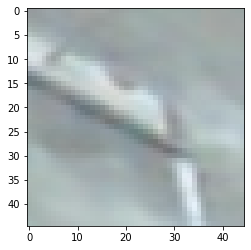

In [ ]:
path_to_img = in_day+"/"+im+ "/"+images[0]
space = cv.imread(path_to_img)
print(space.shape)
n = space
new = cv.resize(space , (height,width))
plt.imshow(new,cmap='gray')


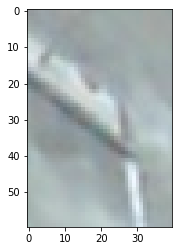

In [ ]:
plt.imshow(n,cmap='gray')